# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [65]:
medical.shape

(1338, 8)

In [66]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: The distribution is not balanced or symmetrical. The median is far from the mean and std is large. However, with a large sample size of 1338, it is far beyond the threshold of about 30 when sampling starts to become normal.__

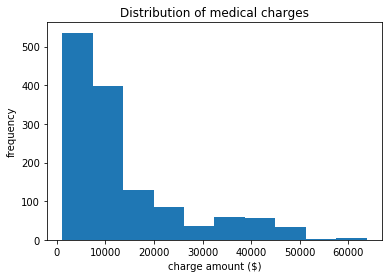

In [67]:
_ = plt.hist(medical.charges)
_ = plt.xlabel('charge amount ($)')
_ = plt.ylabel('frequency')
_ = plt.title('Distribution of medical charges')

In [68]:
charge_mean = np.mean(medical.charges)
charge_median = np.median(medical.charges)
charge_std = np.std(medical.charges, ddof=1)
print("Mean is " + str(charge_mean))
print("Median is " + str(charge_median))
print("Std is " + str(charge_std))

Mean is 13270.422265141257
Median is 9382.033
Std is 12110.011236693994


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: Based on Central Limit Theorem, the t-distribution can be used for small sample sizes (<30), and approaches the normal distribution with larger samples. A t-test can be conducted to check the confidence interval, in order to determine whether the threshold of 12K is likely, given the observed mean and std.__ 

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A: A one-tailed t-test should suffice for a confidence interval test, because the concern is to measure only the null hypothesis of the threshold level, rather than a range. The calculated confidence interval, based on cv=1.65 and stderr=331 gives a margin of error=545, or 95% certain that the true population mean lies between 12725 to 13815. The minimum value of the range is above the 12000 test threshold. We can compare this CI with the interval computed directly from the t.interval() function__

In [69]:
cv_12k = t.ppf(.95, df12k)
print("Critical Value t-one sided is " + str(cv_12k))
stderr_12k = charge_std / np.sqrt(df12k)
print("Standard error for sample is " + str(stderr_12k))
margin_12k =  cv_12k * stderr_12k 
print("Margin of Error is " + str(margin_12k))
print("Range is " + str(charge_mean - margin_12k) + " to " + str(charge_mean + margin_12k))

Critical Value t-one sided is 1.6459941145571317
Standard error for sample is 331.1912409920272
Margin of Error is 545.1388334657494
Range is 12725.283431675507 to 13815.561098607006


In [70]:
# Note that t.ppf(.95) corresponds to t.interval(.90), t.ppf(.975) corresponds to t.ppf(.95)
interval_12k = t.interval(.90, df12k, loc=charge_mean, scale=stderr_12k)
print("The t-interval 95% alpha one-sided (1-p) is " + str(interval_12k))
interval_12k2 = t.interval(.95, df12k, loc=charge_mean, scale=stderr_12k)
print("The t-interval 95% alpha two-side (1-p)/2 is " + str(interval_12k2))

The t-interval 95% alpha one-sided (1-p) is (12725.283431675507, 13815.561098607006)
The t-interval 95% alpha two-side (1-p)/2 is (12620.711196931981, 13920.133333350532)


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A: The assumption is that samples are independent and have equal variances, which is not true. The null hypothesis is that there is no true difference between the 2 mean values. The alternative is to accept the sample difference as likely to be close to the true difference, or that there is a true difference in the 2 mean values.__ 

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A: The t-stat result is the same. What does this statistic mean? Use ddof=1 in np.std() to get the sample std. The p-value is very small, so it's clear that the means being different is almost certain, or that we can accept the sample result as representing the true result.__

The number of charges uninsured is 555
The number of charges insured is 783
The std charge uninsured is 6446.510126811736
The std charge insured is 14045.928418802127
The mean charge uninsured is 8821.421892306294
The mean charge insured 16423.928276537663
The calculated stdev_diff is 11520.034268775256
The calculated t-stat is 11.89329903087671
The mean insured minus mean uninsured is 7602.506384231368


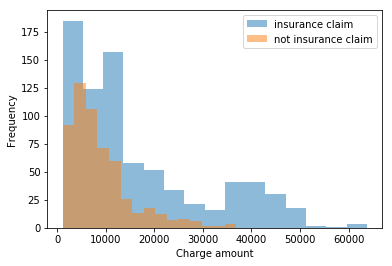

In [76]:
charges_uninsured = medical.charges.loc[medical.insuranceclaim == 0]
charges_insured = medical.charges.loc[medical.insuranceclaim == 1]

n1 = len(charges_uninsured)
n0 = len(charges_insured)
print("The number of charges uninsured is " + str(n1))
print("The number of charges insured is " + str(n0))

s1 = np.std(charges_uninsured, ddof=1)
s0 = np.std(charges_insured, ddof=1)
print("The std charge uninsured is " + str(s1))
print("The std charge insured is " + str(s0))

x1 = np.mean(charges_uninsured)
x0 = np.mean(charges_insured)
print("The mean charge uninsured is " + str(x1))
print("The mean charge insured " + str(x0))

sp = np.sqrt(((n0 -1) * s0 ** 2 + (n1 -1) * s1 ** 2) / (n0 + n1 -2))
print("The calculated stdev_diff is " + str(sp))

t_stat = (x0 - x1) / (sp * np.sqrt(((1/n0) + (1/n1))))
print("The calculated t-stat is " + str(t_stat))            

print("The mean insured minus mean uninsured is " + str(np.mean(charges_insured)-np.mean(charges_uninsured)))

_ = plt.hist(charges_insured, bins=15, alpha=0.5, label='insurance claim')
_ = plt.hist(charges_uninsured, bins=15, alpha=0.5, label='not insurance claim')
_ = plt.xlabel('Charge amount')
_ = plt.ylabel('Frequency')
_ = plt.legend()


In [72]:
from scipy.stats import ttest_ind
ttest_ind(charges_insured, charges_uninsured)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [73]:
#Is this the right formula for p-value from t-stat?
p = (1 - t.cdf(abs(t_stat), df= n0 + n1 - 2))*2
print('{:100.98f}'.format(p))

0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A: The parameter equal_var=False gives a different result, but p-value is so low it does not seem relevant for this test. The differences in the charge amounts looks large by inspecting the mean and std, so the test result seems reasonable.__

In [74]:
ttest_ind(charges_insured, charges_uninsured, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: The z-score is based on the normal distribution and the t-score is used when sample size is small or population variance is unknown. With more observations, the t-distribution gets closer to normal.__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test